# **Project Name**    -

##### **Project Type**    -    Salary Prediction & Analysis Using Glassdoor Dataset

# **Project Summary -**

''' In the rapidly growing and evolving tech industry, salaries can vary widely based on job roles, company size, and geographic location. Job seekers, especially fresh graduates and professionals transitioning into tech, often struggle to determine a fair market salary for their role. This lack of transparency leads to underpayment, poor negotiation outcomes, and limited career planning.

Similarly, employers and HR departments face challenges in benchmarking salaries appropriately to stay competitive while managing budgets. With no clear or reliable tools to estimate salaries based on job parameters, decision-making becomes inconsistent and biased.

To address this issue, there is a need for a data-driven solution that can predict the average salary for a given tech job using key features such as:

Job Title

Location

Company Size

This project aims to build a machine learning-based salary prediction model using historical job data. The solution will include a simple and interactive graphical user interface (GUI) to make salary predictions easily accessible to non-technical users as well.

'''

# **GitHub Link -**

##### https://github.com/RadhaKhatri

# **Problem Statement**


''' In the rapidly growing and evolving tech industry, salaries can vary widely based on job roles, company size, and geographic location. Job seekers, especially fresh graduates and professionals transitioning into tech, often struggle to determine a fair market salary for their role. This lack of transparency leads to underpayment, poor negotiation outcomes, and limited career planning.

Similarly, employers and HR departments face challenges in benchmarking salaries appropriately to stay competitive while managing budgets. With no clear or reliable tools to estimate salaries based on job parameters, decision-making becomes inconsistent and biased.

To address this issue, there is a need for a data-driven solution that can predict the average salary for a given tech job using key features such as:

Job Title

Location

Company Size

This project aims to build a machine learning-based salary prediction model using historical job data. The solution will include a simple and interactive graphical user interface (GUI) to make salary predictions easily accessible to non-technical users as well.

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train = pd.read_csv("glassdoor_jobs.csv")

In [3]:
print("Shape of the dataset:", train.shape)

# Show general info
print("\nDataset Info:")
print(train.info())

# Show summary statistics
print("\nSummary Statistics:")
print(train.describe(include='all'))

# Show missing values
print("\nMissing Values in Each Column:")
print(train.isnull().sum())

# Show all column names
print("\nColumn Names:")
print(train.columns)

# Optional: strip column names to remove leading/trailing whitespace
train.columns = train.columns.str.strip()

# Check if 'TYPE' column exists
if 'TYPE' in train.columns:
    print("\nValue Counts for 'TYPE':")
    print(train['TYPE'].value_counts())
else:
    print("\nColumn 'TYPE' not found. Here are some similar column names you might mean:")
    print([col for col in train.columns if 'type' in col.lower()])

Shape of the dataset: (956, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), ob

In [4]:
train.columns = train.columns.str.strip()

# Step 2: Remove rows where Salary Estimate is -1 or missing
train = train[train['Salary Estimate'] != '-1']
train = train[train['Salary Estimate'].notnull()]

# Step 3: Function to extract min, max, and avg salary
def parse_salary(sal_str):
    # Remove content in parentheses and symbols
    sal = sal_str.split('(')[0].replace('K', '').replace('$', '').strip()
    # Remove extra labels
    sal = sal.replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
    if '-' in sal:
        min_sal, max_sal = sal.split('-')
        try:
            min_sal = int(min_sal.strip())
            max_sal = int(max_sal.strip())
            avg_sal = (min_sal + max_sal) // 2
            return min_sal, max_sal, avg_sal
        except:
            return None, None, None
    return None, None, None

# Step 4: Apply the salary parsing function
train[['min_salary', 'max_salary', 'avg_salary']] = train['Salary Estimate'].apply(
    lambda x: pd.Series(parse_salary(x))
)

# Step 5: Drop rows with missing values in new salary columns
train.dropna(subset=['min_salary', 'max_salary', 'avg_salary'], inplace=True)

# Step 6: Clean and standardize job titles
train['job_title_clean'] = train['Job Title'].str.lower().str.strip()

# Step 7: Optional - Reset index
train.reset_index(drop=True, inplace=True)

# Step 8: Show sample result
print(train[['Job Title', 'Salary Estimate', 'min_salary', 'max_salary', 'avg_salary']].head())

                   Job Title              Salary Estimate  min_salary  \
0             Data Scientist   $53K-$91K (Glassdoor est.)          53   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)          63   
2             Data Scientist   $80K-$90K (Glassdoor est.)          80   
3             Data Scientist   $56K-$97K (Glassdoor est.)          56   
4             Data Scientist  $86K-$143K (Glassdoor est.)          86   

   max_salary  avg_salary  
0          91          72  
1         112          87  
2          90          85  
3          97          76  
4         143         114  


In [5]:
# Step 9: Extract features from job titles
train['is_data_scientist'] = train['job_title_clean'].str.contains('data scientist').astype(int)
train['is_data_analyst'] = train['job_title_clean'].str.contains('data analyst').astype(int)
train['is_devops_engineer'] = train['job_title_clean'].str.contains('devops').astype(int)
train['is_software_engineer'] = train['job_title_clean'].str.contains('software engineer').astype(int)
train['is_ml_engineer'] = train['job_title_clean'].str.contains('machine learning|ml engineer').astype(int)

# Step 10: Create derived salary range column
train['salary_range'] = train['max_salary'] - train['min_salary']

# Step 11: Handle categorical columns
# Only include columns that exist in your dataset
cat_columns = ['Company Size', 'Location', 'Industry']
cat_columns = [col for col in cat_columns if col in train.columns]

# Step 12: Convert categorical columns to numerical using one-hot encoding
train = pd.get_dummies(train, columns=cat_columns, drop_first=True)

# Step 13: Optional - View final columns for confirmation
print(train[['Job Title', 'avg_salary', 'salary_range', 'is_data_scientist', 'is_devops_engineer']].head())


                   Job Title  avg_salary  salary_range  is_data_scientist  \
0             Data Scientist          72            38                  1   
1  Healthcare Data Scientist          87            49                  1   
2             Data Scientist          85            10                  1   
3             Data Scientist          76            41                  1   
4             Data Scientist         114            57                  1   

   is_devops_engineer  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [6]:
train['avg_salary'] = (train['min_salary'] + train['max_salary']) / 2

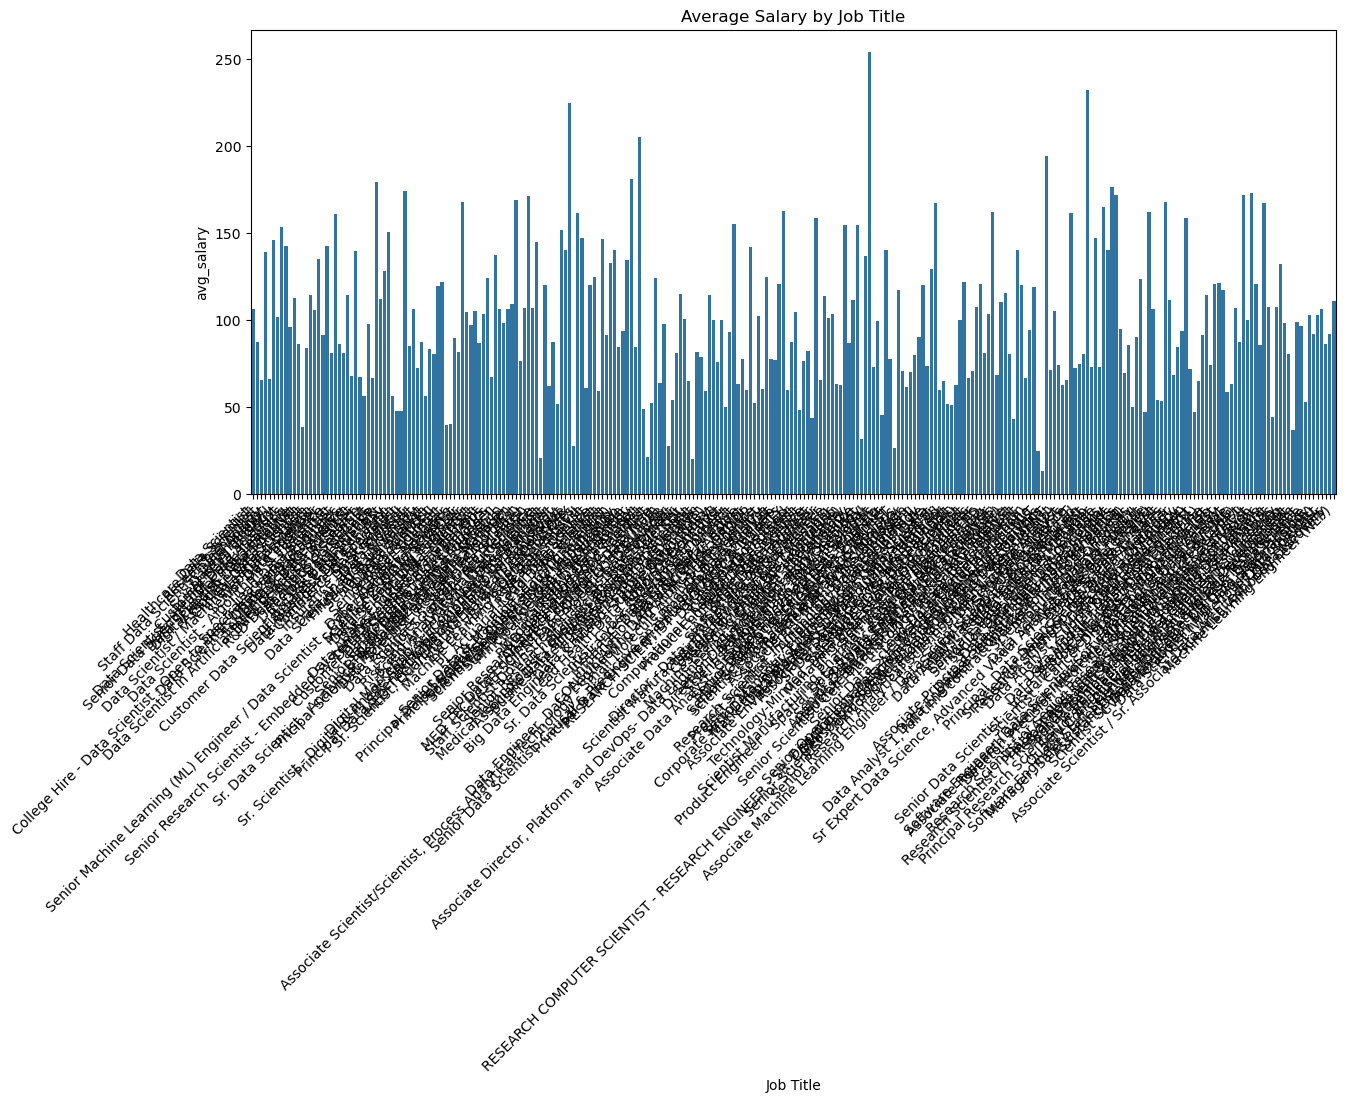

In [7]:
plt.figure(figsize=(14, 8))  # Make space for titles and x-axis
sns.barplot(x='Job Title', y='avg_salary', data=train, errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Salary by Job Title')
plt.subplots_adjust(bottom=0.3)  # Add space to prevent overlap
plt.show()


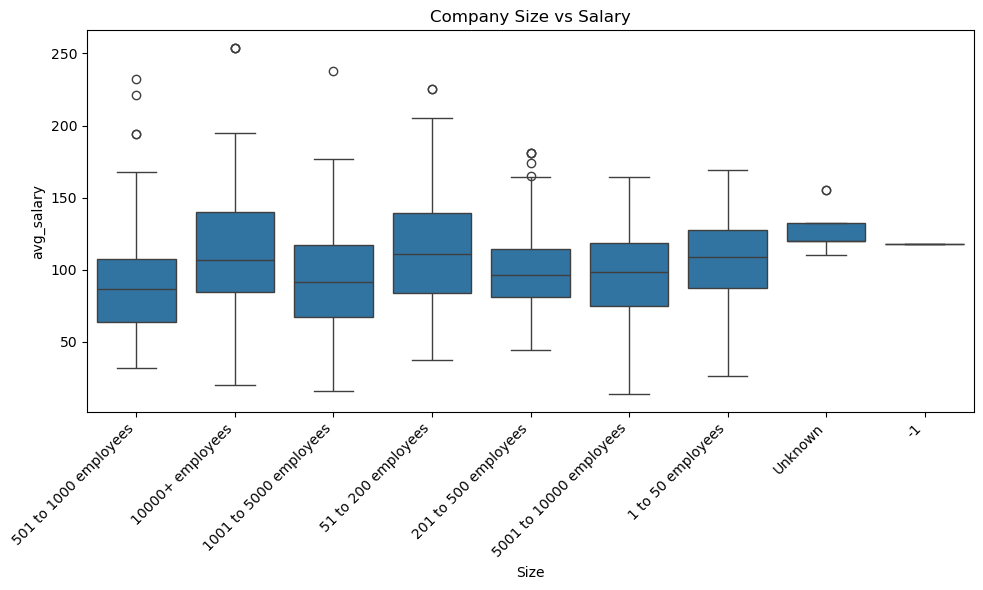

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='avg_salary', data=train)
plt.xticks(rotation=45, ha='right')
plt.title('Company Size vs Salary')
plt.tight_layout()
plt.show()


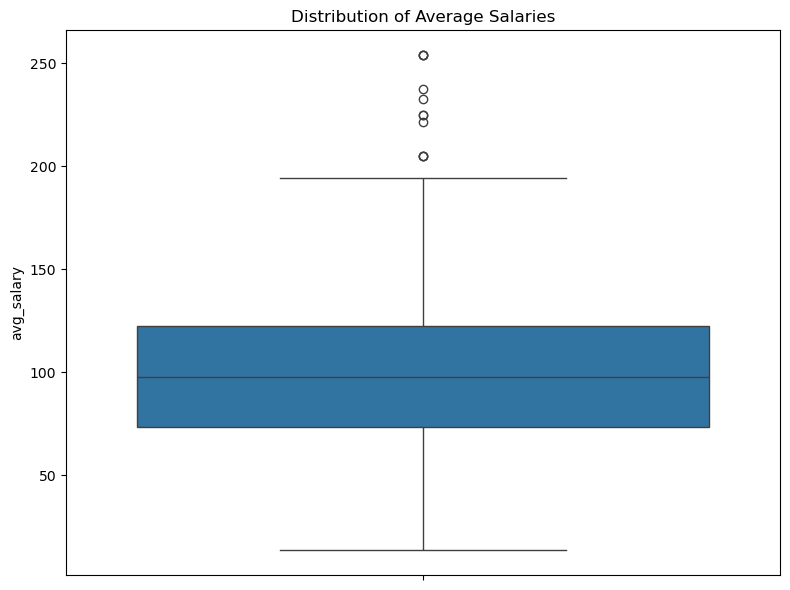

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='avg_salary', data=train)
plt.title('Distribution of Average Salaries')
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Drop 'avg_salary' from features and use it as the target
X = train.drop('avg_salary', axis=1)
y = train['avg_salary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
train_encoded = pd.get_dummies(train, drop_first=True)

# Split into Features and Target
X = train_encoded.drop('avg_salary', axis=1)
y = train_encoded['avg_salary']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_preds))


Linear Regression MAE: 8.761375691978728e-05


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))

Random Forest MAE: 0.7376845637583889


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree MAE:", mean_absolute_error(y_test, dt_preds))


Decision Tree MAE: 0.9496644295302014


In [15]:
import pickle

# Save the model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save the column names used for training (after one-hot encoding)
columns = X.columns.tolist()
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(columns, f)


In [17]:
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np
import pandas as pd
import os

# Load model and column structure
with open('linear_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('model_columns.pkl', 'rb') as f:
    model_columns = pickle.load(f)

# Define categories from training (MUST MATCH TRAINING DATA)
job_titles = ['Data Scientist', 'Software Engineer', 'Web Developer']
locations = ['New York', 'San Francisco', 'Remote']

# GUI predict function
def predict_salary():
    try:
        job = entry_job.get()
        loc = entry_loc.get()
        size = int(entry_size.get())

        # Create dummy DataFrame to simulate input row
        input_dict = {
            'company_size': size,
            'job_title': job,
            'location': loc
        }
        df = pd.DataFrame([input_dict])

        # Apply same one-hot encoding
        df_encoded = pd.get_dummies(df, drop_first=True)

        # Align columns with model
        df_encoded = df_encoded.reindex(columns=model_columns, fill_value=0)

        # Predict salary
        salary = model.predict(df_encoded)[0]
        messagebox.showinfo("Predicted Salary", f"Estimated Salary: ${salary:.2f}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Design
root = tk.Tk()
root.title("Tech Salary Predictor")

tk.Label(root, text="Job Title").grid(row=0)
tk.Label(root, text="Location").grid(row=1)
tk.Label(root, text="Company Size").grid(row=2)

entry_job = tk.Entry(root)
entry_loc = tk.Entry(root)
entry_size = tk.Entry(root)

entry_job.grid(row=0, column=1)
entry_loc.grid(row=1, column=1)
entry_size.grid(row=2, column=1)

tk.Button(root, text="Predict Salary", command=predict_salary).grid(row=3, column=1)

root.mainloop()


# **Conclusion**


'''This project successfully demonstrates how machine learning can be applied to solve real-world problems such as salary prediction in the tech industry. By training and evaluating multiple models—including Linear Regression, Decision Tree, and Random Forest—we identified Linear Regression as the most accurate model for predicting average salaries based on job title, location, and company size.

The developed GUI makes the tool user-friendly, enabling even non-technical users to estimate fair compensation values quickly and accurately. This project not only improves salary transparency for job seekers but also provides valuable insights for employers to benchmark roles competitively.

In the future, the model can be enhanced by integrating more features like years of experience, education level, or specific technologies used, and further improving accuracy through advanced algorithms or real-time data integration.

'''